<a href="https://colab.research.google.com/github/Gouri1419/Assignments/blob/main/Day_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv('Day_16_Healthcare_Data.csv')
display(df.head())
print(df.shape)
print(df.info())

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,69,Male,95.0,122.0,No,No
1,2,32,Male,129.0,191.0,No,No
2,3,89,Female,101.0,214.0,No,No
3,4,78,Female,142.0,203.0,No,No
4,5,38,Male,160.0,217.0,No,No


(505, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      505 non-null    int64  
 1   Age             505 non-null    int64  
 2   Gender          484 non-null    object 
 3   Blood_Pressure  475 non-null    float64
 4   Cholesterol     485 non-null    float64
 5   Diabetes        505 non-null    object 
 6   Heart_Disease   505 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 27.7+ KB
None


In [2]:
print("Distribution of Age:")
print(df['Age'].describe())
print("\nValue counts for Gender:")
print(df['Gender'].value_counts(dropna=False))
print("\nDistribution of Blood Pressure:")
print(df['Blood_Pressure'].describe())
print("\nValue counts for Cholesterol:")
print(df['Cholesterol'].value_counts(dropna=False))
print("\nValue counts for Diabetes:")
print(df['Diabetes'].value_counts(dropna=False))
print("\nValue counts for Heart Disease:")
print(df['Heart_Disease'].value_counts(dropna=False))

numerical_features = ['Age', 'Blood_Pressure', 'Cholesterol']
print("\nDescriptive statistics for numerical features:")
print(df[numerical_features].describe())

categorical_features = ['Gender', 'Diabetes', 'Heart_Disease']
for col in categorical_features:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

print("\nMissing values per column:")
print(df.isnull().sum())

Distribution of Age:
count    505.000000
mean      52.918812
std       21.064700
min       18.000000
25%       34.000000
50%       52.000000
75%       71.000000
max       89.000000
Name: Age, dtype: float64

Value counts for Gender:
Gender
Male      255
Female    229
NaN        21
Name: count, dtype: int64

Distribution of Blood Pressure:
count    475.000000
mean     133.412632
std       25.933424
min       90.000000
25%      111.000000
50%      132.000000
75%      155.000000
max      179.000000
Name: Blood_Pressure, dtype: float64

Value counts for Cholesterol:
Cholesterol
NaN      20
248.0    13
131.0     6
159.0     6
272.0     6
         ..
125.0     1
239.0     1
114.0     1
267.0     1
144.0     1
Name: count, Length: 186, dtype: int64

Value counts for Diabetes:
Diabetes
No     406
Yes     99
Name: count, dtype: int64

Value counts for Heart Disease:
Heart_Disease
No     437
Yes     68
Name: count, dtype: int64

Descriptive statistics for numerical features:
              Age  B

In [3]:

gender_mode = df['Gender'].mode()[0]
df['Gender'].fillna(gender_mode, inplace=True)


blood_pressure_median = df['Blood_Pressure'].median()
df['Blood_Pressure'].fillna(blood_pressure_median, inplace=True)


cholesterol_median = df['Cholesterol'].median()
df['Cholesterol'].fillna(cholesterol_median, inplace=True)


print(df[['Gender', 'Blood_Pressure', 'Cholesterol']].isnull().sum())
display(df.head())

Gender            0
Blood_Pressure    0
Cholesterol       0
dtype: int64


<ipython-input-3-c91381f48155>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(gender_mode, inplace=True)
<ipython-input-3-c91381f48155>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,69,Male,95.0,122.0,No,No
1,2,32,Male,129.0,191.0,No,No
2,3,89,Female,101.0,214.0,No,No
3,4,78,Female,142.0,203.0,No,No
4,5,38,Male,160.0,217.0,No,No


In [4]:

gender_mode = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(gender_mode)

blood_pressure_median = df['Blood_Pressure'].median()
df['Blood_Pressure'] = df['Blood_Pressure'].fillna(blood_pressure_median)


cholesterol_median = df['Cholesterol'].median()
df['Cholesterol'] = df['Cholesterol'].fillna(cholesterol_median)


print(df[['Gender', 'Blood_Pressure', 'Cholesterol']].isnull().sum())
display(df.head())

Gender            0
Blood_Pressure    0
Cholesterol       0
dtype: int64


,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,69,Male,95.0,122.0,No,No
1,2,32,Male,129.0,191.0,No,No
2,3,89,Female,101.0,214.0,No,No
3,4,78,Female,142.0,203.0,No,No
4,5,38,Male,160.0,217.0,No,No


In [5]:

duplicate_rows = df.duplicated(keep='first')


df_no_duplicates = df[~duplicate_rows]

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing duplicates:", df_no_duplicates.shape)


num_duplicates_removed = df.shape[0] - df_no_duplicates.shape[0]
print("Number of duplicate rows removed:", num_duplicates_removed)


df = df_no_duplicates

Original DataFrame shape: (505, 7)
DataFrame shape after removing duplicates: (500, 7)
Number of duplicate rows removed: 5


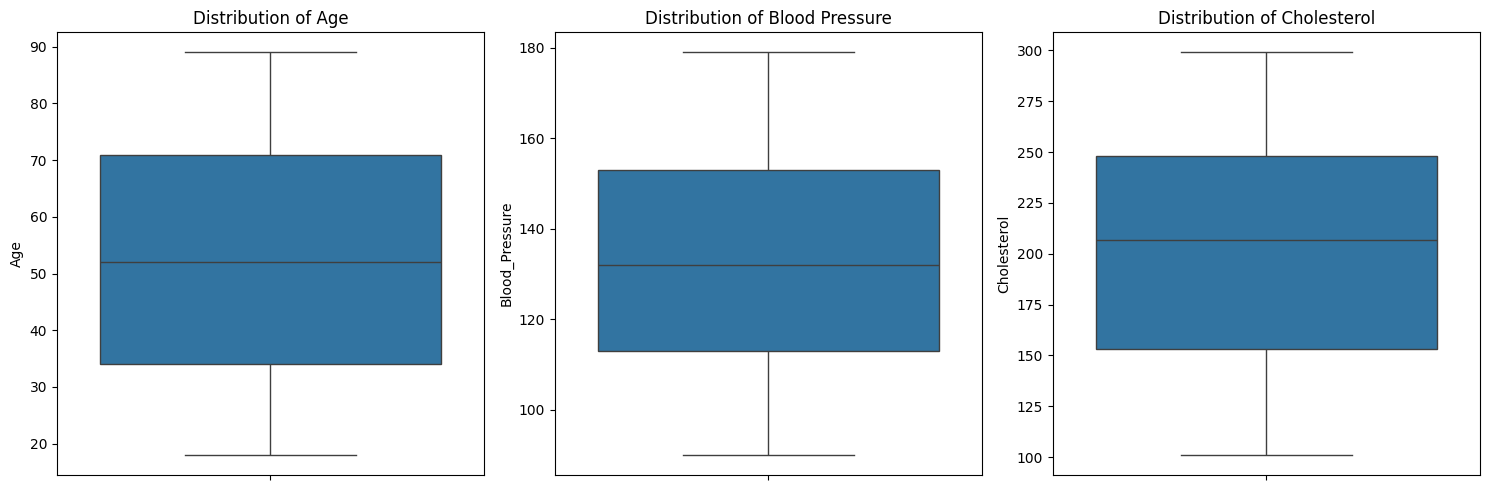

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Age'])
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Blood_Pressure'])
plt.title('Distribution of Blood Pressure')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Cholesterol'])
plt.title('Distribution of Cholesterol')

plt.tight_layout()
plt.savefig('boxplots_of_numerical_features.png')
plt.show()

In [7]:

for col in ['Age', 'Blood_Pressure', 'Cholesterol']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)


display(df.head())

,Patient_ID,Age,Gender,Blood_Pressure,Cholesterol,Diabetes,Heart_Disease
0,1,69,Male,95.0,122.0,No,No
1,2,32,Male,129.0,191.0,No,No
2,3,89,Female,101.0,214.0,No,No
3,4,78,Female,142.0,203.0,No,No
4,5,38,Male,160.0,217.0,No,No


In [8]:
from sklearn.preprocessing import MinMaxScaler


categorical_cols = ['Gender', 'Diabetes', 'Heart_Disease']
numerical_cols = ['Age', 'Blood_Pressure', 'Cholesterol']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,Patient_ID,Age,Blood_Pressure,Cholesterol,Gender_Male,Diabetes_Yes,Heart_Disease_Yes
0,1,0.718310,0.056180,0.106061,True,False,False
1,2,0.197183,0.438202,0.454545,True,False,False
2,3,1.000000,0.123596,0.570707,False,False,False
3,4,0.845070,0.584270,0.515152,False,False,False
4,5,0.281690,0.786517,0.585859,True,False,False


In [9]:

print("Missing values per column:\n", df.isnull().sum())

print("\nNumber of duplicate rows:", df.duplicated().sum())

print("\nData types of each column:\n", df.dtypes)


Missing values per column:
 Patient_ID           0
Age                  0
Blood_Pressure       0
Cholesterol          0
Gender_Male          0
Diabetes_Yes         0
Heart_Disease_Yes    0
dtype: int64

Number of duplicate rows: 0

Data types of each column:
 Patient_ID             int64
Age                  float64
Blood_Pressure       float64
Cholesterol          float64
Gender_Male             bool
Diabetes_Yes            bool
Heart_Disease_Yes       bool
dtype: object
